   # Math 495 Final Project

 ## <span style="color: purple;">Kordell Schrock & Clark Reimers</span>

In [44]:
# Installs necessary packages for you
import sys
import subprocess
import pkg_resources

required = {'category_encoders', 'sklearn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
    print("all dependencies installed now")

all dependencies installed now


In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce


df = pd.read_csv("GameSales2016.csv") #import dataset
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


 ## <span style="color: purple;">Clean the Data</span>

In [66]:
df = df.dropna() #remove NA rows
df.info() #describe the coluns to check the values null and type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [67]:

df2 = pd.read_csv("GameSales2016.csv") #import dataset

#cleaning up variables
df2 = df2.replace(to_replace = '\n',value='',regex=True)
df2 = df2.dropna()
df2 = df2.select_dtypes(exclude=['object'])

#Reset indeces
df2.reset_index(drop=True, inplace=True)

In [68]:
df2 = df2.sort_values(by=['Global_Sales'],ascending=False)
#for i in df2.columns:
#    sns.relplot(y=i,x='Global_Sales',data=df2)

#plt.tight_layout()
#plt.show()

In [69]:
#based on the graphs, I think that the best variables to use are
#maybe publisher, genre
#probably Critic_Score, User_Score, User_Count, Developer, Rating
#definitely (so long as it is in scope) NA_sales, EU_Sales, Other_Sales, JP_Sales

In [70]:
ratingToNumber = {'RP':0,'AO':1,'E10+':2,'T':3,'M':4,'E':5}
#df2['Rating'] = df2['Rating'].map(ratingToNumber)

#tmplist = df2[['Critic_Score','User_Score','User_Count','Rating','NA_Sales',
#                   'EU_Sales','Other_Sales','JP_Sales']].copy()

feature_cols = df2.columns.values.tolist()

#removing target as well as some other variables that will basically be cheating to include
feature_cols.remove('Global_Sales')
feature_cols.remove('NA_Sales')
feature_cols.remove('EU_Sales')
feature_cols.remove('JP_Sales')
feature_cols.remove('Other_Sales')
tmplist = df2[feature_cols]


y=df2.Global_Sales
tmp = []
for i in tmplist:
    X=pd.DataFrame(np.c_[df2[i]],columns=[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=9)
    lin_reg_mod = LinearRegression()
    lin_reg_mod.fit(X_train, y_train)
    pred = lin_reg_mod.predict(X_test)
    test_set_r2 = r2_score(y_test, pred)
    tmp.append(tuple((i,test_set_r2)))

In [71]:

##sort tuples in descending order to find the highest rsquared variables
tmp.sort(key = lambda x:x[1],reverse=True)
#print("vals",tmp)

##Now I want to run it again but using the first 4 largest r squared values (I determined 4 was the best through trial and error)
##They are curbweight, enginesize, carwidth, and horsepower, as seen in the tuple print out
##curbweight = int64, enginesize = int64, carwidth = float64, horsepower = int64
#print(df.dtypes)

X=pd.DataFrame(np.c_[df2[tmp[0][0]],df2[tmp[1][0]],df2[tmp[2][0]],df2[tmp[3][0]]],
               columns=[tmp[0][0],tmp[1][0],tmp[2][0],tmp[3][0]])
y=df2.Global_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
test_set_r2 = r2_score(y_test, pred)
print('rsquared =',test_set_r2)
mae = mean_absolute_error(y_test, pred)
print('MAE is:',mae)
mse = mean_squared_error(y_test, pred)
print('MSE is:',mse)
#accuracy
lr_mae = mae
print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

rsquared = 0.1699938113678212
MAE is: 0.6933801363253511
MSE is: 1.9022987291505449
Linear Regression Performance on the test set: MAE = 0.6934


In [72]:
##You will have to report the summary of the model, predictions and actual values as two columns in a dataframe
summary = pd.DataFrame()
summary['_predicted_'] = pred
summary['_actual_'] = y_test
summary = summary.dropna()
##Reset indeces
summary.reset_index(drop=True, inplace=True)
print("\nPredictions vs Actual values:\n",summary)
#End 


Predictions vs Actual values:
      _predicted_  _actual_
0       0.027834     28.32
1       0.015267     21.79
2       0.263983     15.29
3       0.679947     13.79
4       1.154425     13.47
..           ...       ...
583     0.685301      0.61
584     2.201898      0.61
585     0.678072      0.61
586     0.112214      0.61
587     1.541806      0.61

[588 rows x 2 columns]


In [73]:
#'User_Score' rows with 'tbd' values to be dropped
df = df.drop(df[df.User_Score == 'tbd'].index)
# Replace old videogame rating convention "K-A" with "E"
df['Rating']=df['Rating'].replace(['K-A'], 'E')
#Convert 'Year_of_Release' from float to integer
df['Year_of_Release']=df['Year_of_Release'].astype(int)
#Convert 'User_Score' from object to float
df['User_Score']=10*df['User_Score'].astype(float)
#rename column
df = df.rename(columns={"Year_of_Release": "Year"})
#calculate how old a Video Game is
df["Age"] = 2018 - df["Year"]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,12
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,10
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,9
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E,12
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E,12


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
noObjects = df.select_dtypes(exclude=['object']) #remove object types
Xcols= noObjects.drop([], axis=1)
vif = pd.DataFrame()
vif["features"] = Xcols.columns
vif["vif_Factor"] = [variance_inflation_factor(Xcols.values, i) for i in range(Xcols.shape[1])]
print(vif) #vif Factor is helpful to find columns to remove since they are not good independent variables
#VIF factor under 10 is good for independent variables

        features     vif_Factor
0           Year      36.702251
1       NA_Sales   26642.150661
2       EU_Sales   13450.105943
3       JP_Sales    2355.419376
4    Other_Sales    2076.754351
5   Global_Sales  109761.645134
6   Critic_Score       1.841024
7   Critic_Count       1.394983
8     User_Score       1.711244
9     User_Count       1.284541
10           Age       8.658687


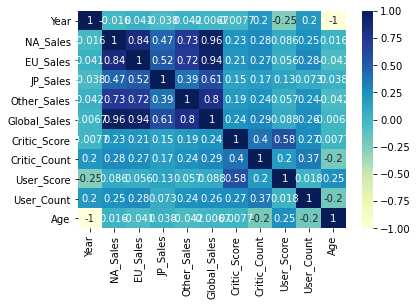

In [75]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") #print the heat map
plt.show()

In [76]:
scored = df.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()
#desribe the numeric data

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,71.856264,174.722344,10.563223
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,14.399417,587.428538,4.211248
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,5.000000,4.000000,2.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,65.000000,11.000000,7.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,75.000000,27.000000,11.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,82.000000,89.000000,14.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,96.000000,10665.000000,33.000000


In [77]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [78]:
#def mae(y_true, y_pred):
 #return np.average(abs(y_true - y_pred))

In [79]:
basic_target = pd.Series(features["Global_Sales"])
#Global sales is our dependant variable
basic_features = features.drop(columns="Global_Sales")
#Select all of the variables except Global Sales
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)



In [80]:
baseline_guess = np.median(target_train)
basic_baseline_mae = np.average(abs(target_test - baseline_guess))


In [81]:

# Loss function to be optimized
loss = ["ls", "lad", "huber"]
# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]
# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
# Minimum number of samples to split a node
min_samples_split = [2, 5, 10, 20, 30, 50]
# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt’, ‘log2']

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}




In [97]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)
basic_final_model = grid_search.best_estimator_
basic_final_pred = basic_final_model.predict(features_test)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [89]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.470912           nan         nan -0.48749142 -0.54801548
         nan         nan -0.45967161 -0.50585697         nan -0.49102105
 -0.54748501 -0.48674712         nan -0.46532794         nan         nan
 -0.56044758 -0.45939698]
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [        nan -0.37398727         nan         nan -0.45874604 -0.47566579
         nan         nan -0.24854401 -0.49138205         nan -0.45101216
 -0.08530341 -0.45696836         nan -0.25967183         nan         nan
 -0.16923803 -0.28243464]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto',
                                                         'sqrt’, ‘log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              50]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [90]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
19,-0.459397,lad,15,12,5,auto
8,-0.459672,lad,15,6,20,auto
15,-0.465328,lad,10,1,2,auto
1,-0.470912,huber,5,6,2,auto
13,-0.486747,lad,3,6,2,auto
4,-0.487491,lad,3,8,5,auto
11,-0.491021,huber,3,6,50,auto
9,-0.505857,lad,2,10,20,auto
12,-0.547485,ls,15,4,10,auto
5,-0.548015,ls,3,4,50,auto


In [91]:
from sklearn.model_selection import GridSearchCV
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)


In [92]:
grid_search.fit(features_train, target_train);


Fitting 4 folds for each of 6 candidates, totalling 24 fits


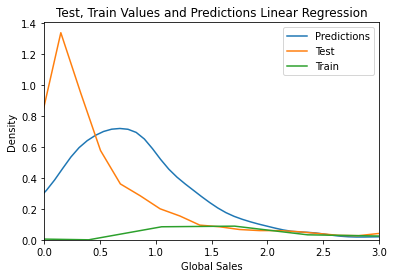

In [93]:
g = (sns.kdeplot(pred, label = "Predictions").set(xlim=(0,3)))
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions Linear Regression");
plt.show(g)

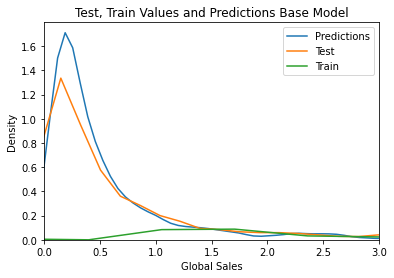

In [98]:
g = (sns.kdeplot(basic_final_pred, label = "Predictions").set(xlim=(0,3)))
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions Base Model");
plt.show(g)

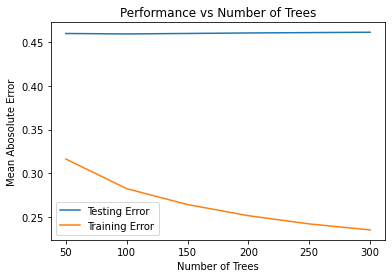

In [99]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

In [100]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor(n_estimators=15,criterion='mse',random_state=25)
#using the Random Forest Regressor 
# Train the model
    #model.fit(features_train, target_train)
  # Make predictions and evalute
    #model_pred = model.predict(features_test)
RandomForestRegressor.fit(features_train,target_train) # fit the model
RandomForestRegressor_pred = RandomForestRegressor.predict(features_test) #get the prediction
random_forest_mae = mean_absolute_error(target_test, RandomForestRegressor_pred)


In [101]:
from sklearn.metrics import r2_score

score = r2_score(target_test,RandomForestRegressor_pred) #get the r squared value
print('Model: Random Forest')
print("r2score: " , score)

Model: Random Forest
r2score:  0.4006238620809741


In [102]:
actualvspredicted= pd.DataFrame()
actualvspredicted['_Actual_'] = target_test
actualvspredicted['_Predicted_'] = RandomForestRegressor_pred
print(actualvspredicted)

       _Actual_  _Predicted_
146        6.03     4.588667
4427       0.44     0.409333
6970       0.23     0.156000
3885       0.51     0.497333
11023      0.09     0.363333
...         ...          ...
2447       0.85     0.422000
14897      0.03     0.706000
7156       0.22     0.210667
13120      0.05     0.110000
2138       0.96     1.768000

[1365 rows x 2 columns]


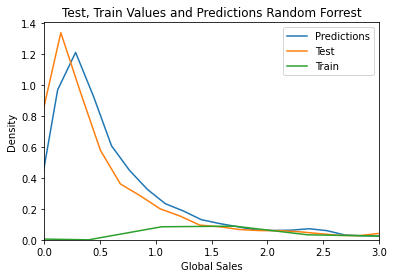

In [103]:
g = (sns.kdeplot(RandomForestRegressor_pred, label = "Predictions").set(xlim=(0,3)))
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")
plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions Random Forrest");

plt.show(g)

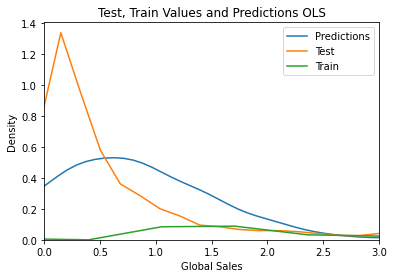

In [106]:
import statsmodels.api as sm
est = sm.OLS(target_train,features_train).fit() #fit the model the data
OLS_pred = est.predict(features_test)
OLS_mae = mean_absolute_error(target_test, OLS_pred)


g = (sns.kdeplot(OLS_pred, label = "Predictions").set(xlim=(0,3)))
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")
plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions OLS");

plt.show(g)


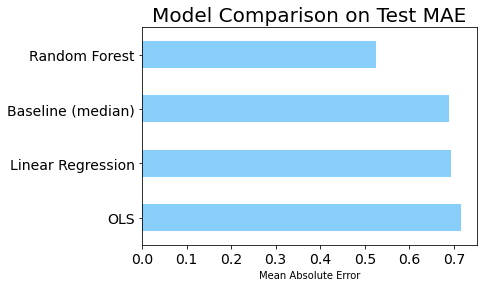

In [107]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Random Forest", "Baseline (median)", 
                                          'OLS'],
                                 "mae": [lr_mae, random_forest_mae, basic_baseline_mae, OLS_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);
